A Machine Learning model is defined as a mathematical model with several parameters that need to be learned from the data. By training a model with existing data, we can fit the model parameters. 
However, there is another kind of parameter, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn. This article aims to explore various strategies to tune hyperparameters for Machine learning models. 

## Hyperparameter Tuning
Hyperparameter tuning is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine. The goal of hyperparameter tuning is to find the values that lead to the best performance on a given task.

## What are Hyperparameters?
In the context of machine learning, hyperparameters are configuration variables that are set before the training process of a model begins. They control the learning process itself, rather than being learned from the data. Hyperparameters are often used to tune the performance of a model, and they can have a significant impact on the model’s accuracy, generalization, and other metrics.

## Different Ways of Hyperparameters Tuning
Hyperparameters are configuration variables that control the learning process of a machine learning model. They are distinct from model parameters, which are the weights and biases that are learned from the data. There are several different types of hyperparameters:

## Hyperparameters in Neural Networks
Neural networks have several essential hyperparameters that need to be adjusted, including:

1. Learning rate: This hyperparameter controls the step size taken by the optimizer during each iteration of training. Too small a learning rate can result in slow convergence, while too large a learning rate can lead to instability and divergence.

2. Epochs: This hyperparameter represents the number of times the entire training dataset is passed through the model during training. Increasing the number of epochs can improve the model’s performance but may lead to overfitting if not done carefully.

3. Number of layers: This hyperparameter determines the depth of the model, which can have a significant impact on its complexity and learning ability.

4. Number of nodes per layer: This hyperparameter determines the width of the model, influencing its capacity to represent complex relationships in the data.

5. Architecture: This hyperparameter determines the overall structure of the neural network, including the number of layers, the number of neurons per layer, and the connections between layers. The optimal architecture depends on the complexity of the task and the size of the dataset

6. Activation function: This hyperparameter introduces non-linearity into the model, allowing it to learn complex decision boundaries. Common activation functions include sigmoid, tanh, and Rectified Linear Unit (ReLU).

## Hyperparameters in Support Vector Machine

We take into account some essential hyperparameters for fine-tuning SVMs:

1. C: The regularization parameter that controls the trade-off between the margin and the number of training errors. A larger value of C penalizes training errors more heavily, resulting in a smaller margin but potentially better generalization performance. A smaller value of C allows for more training errors but may lead to overfitting.
2. Kernel: The kernel function that defines the similarity between data points. Different kernels can capture different relationships between data points, and the choice of kernel can significantly impact the performance of the SVM. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.
3. Gamma: The parameter that controls the influence of support vectors on the decision boundary. A larger value of gamma indicates that nearby support vectors have a stronger influence, while a smaller value indicates that distant support vectors have a weaker influence. The choice of gamma is particularly important for RBF kernels.


## Hyperparameters in XGBoost

The following essential XGBoost hyperparameters need to be adjusted:

1. learning_rate: This hyperparameter determines the step size taken by the optimizer during each iteration of training. A larger learning rate can lead to faster convergence, but it may also increase the risk of overfitting. A smaller learning rate may result in slower convergence but can help prevent overfitting.

3. n_estimators: This hyperparameter determines the number of boosting trees to be trained. A larger number of trees can improve the model’s accuracy, but it can also increase the risk of overfitting. A smaller number of trees may result in lower accuracy but can help prevent overfitting.

3. max_depth: This hyperparameter determines the maximum depth of each tree in the ensemble. A larger max_depth can allow the trees to capture more complex relationships in the data, but it can also increase the risk of overfitting. A smaller max_depth may result in less complex trees but can help prevent overfitting.

4. min_child_weight: This hyperparameter determines the minimum sum of instance weight (hessian) needed in a child node. A larger min_child_weight can help prevent overfitting by requiring more data to influence the splitting of trees. A smaller min_child_weight may allow for more aggressive tree splitting but can increase the risk of overfitting.

5. subsample: This hyperparameter determines the percentage of rows used for each tree construction. A smaller subsample can improve the efficiency of training but may reduce the model’s accuracy. A larger subsample can increase the accuracy but may make training more computationally expensive.

Some other examples of model hyperparameters include:

1. The penalty in Logistic Regression Classifier i.e. L1 or L2 regularization

2. Number of Trees and Depth of Trees for Random Forests.

3. The learning rate for training a neural network.

4. Number of Clusters for Clustering Algorithms.

5. The k in k-nearest neighbors.

## Hyperparameter Tuning techniques

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. The two best strategies for Hyperparameter tuning are:

1. GridSearchCV

2. RandomizedSearchCV

3. Bayesian Optimization


1. GridSearchCV 

Grid search can be considered as a “brute force” approach to hyperparameter optimization. We fit the model using all possible combinations after creating a grid of potential discrete hyperparameter values. We log each set’s model performance and then choose the combination that produces the best results. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values. 

An exhaustive approach that can identify the ideal hyperparameter combination is grid search. But the slowness is a disadvantage. It often takes a lot of processing power and time to fit the model with every potential combination, which might not be available.

For example: if we want to set two hyperparameters C and Alpha of the Logistic Regression Classifier model, with different sets of values. The grid search technique will construct many versions of the model with all possible combinations of hyperparameters and will return the best one. 

As in the image, for C = [0.1, 0.2, 0.3, 0.4, 0.5] and Alpha = [0.1, 0.2, 0.3, 0.4]. For a combination of C=0.3 and Alpha=0.2, the performance score comes out to be 0.726(Highest), therefore it is selected. 

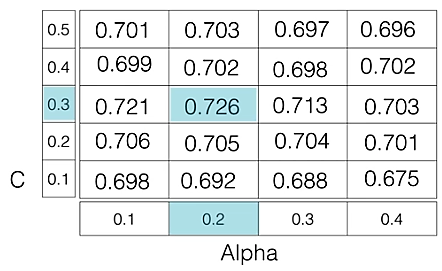 


In [1]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification


X, y = make_classification(
	n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Assuming X and y are your feature matrix and target variable
# Fit the GridSearchCV object to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.853


2. RandomizedSearchCV 

As the name suggests, the random search method selects values at random as opposed to the grid search method’s use of a predetermined set of numbers. Every iteration, random search attempts a different set of hyperparameters and logs the model’s performance. It returns the combination that provided the best outcome after several iterations. This approach reduces unnecessary computation.

RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in a random fashion to find the best set of hyperparameters. The advantage is that, in most cases, a random search will produce a comparable result faster than a grid search.

The following code illustrates how to use RandomizedSearchCV 

In [2]:
import numpy as np
from sklearn.datasets import make_classification

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Rest of your code (including the RandomizedSearchCV part)
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
	"max_depth": [3, None],
	"max_features": randint(1, 9),
	"min_samples_leaf": randint(1, 9),
	"criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 3}
Best score is 0.747


3. Bayesian Optimization

Grid search and random search are often inefficient because they evaluate many unsuitable hyperparameter combinations without considering the previous iterations’ results. Bayesian optimization, on the other hand, treats the search for optimal hyperparameters as an optimization problem. It considers the previous evaluation results when selecting the next hyperparameter combination and applies a probabilistic function to choose the combination that will likely yield the best results. This method discovers a good hyperparameter combination in relatively few iterations.

Data scientists use a probabilistic model when the objective function is unknown. The probabilistic model estimates the probability of a hyperparameter combination’s objective function result based on past evaluation results.

$ P(score(y)|hyperparameters(x)) $

It is a “surrogate” of the objective function, which can be the root-mean-square error (RMSE), for example. The objective function is calculated using the training data with the hyperparameter combination, and we try to optimize it (maximize or minimize, depending on the objective function selected).

Applying the probabilistic model to the hyperparameters is computationally inexpensive compared to the objective function. Therefore, this method typically updates and improves the surrogate probability model every time the objective function runs. Better hyperparameter predictions decrease the number of objective function evaluations needed to achieve a good result. Gaussian processes, random forest regression, and tree-structured Parzen estimators (TPE) are examples of surrogate models.

The Bayesian optimization model is complex to implement, but off-the-shelf libraries like Ray Tune can simplify the process. It’s worth using this type of model because it finds an adequate hyperparameter combination in relatively few iterations. However, compared to grid search or random search, we must compute Bayesian optimization sequentially, so it doesn’t allow distributed processing. Therefore, Bayesian optimization takes longer yet uses fewer computational resources.